In [344]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [345]:
train = pd.read_csv('Letters_train.csv')
test = pd.read_csv('Letters_test.csv')

In [346]:
train.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgeycor,yedge,yedgexcor
0,B,2,6,4,4,3,8,8,5,7,7,6,6,2,8,6,9
1,R,4,8,5,6,4,7,8,6,5,7,6,8,3,7,6,9
2,B,4,8,6,6,7,8,7,6,3,7,8,7,6,10,8,9
3,A,5,6,7,5,5,8,8,3,5,7,9,8,5,9,4,6
4,B,2,5,5,3,3,9,6,3,6,10,4,7,4,7,6,9


In [347]:
test.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgeycor,yedge,yedgexcor
0,P,2,3,4,2,1,8,11,4,3,10,4,2,0,9,3,8
1,P,3,4,5,6,4,8,9,3,2,7,8,6,5,10,5,5
2,R,6,9,6,4,4,6,8,3,5,7,4,10,5,8,6,8
3,B,6,9,8,6,8,7,9,6,5,7,5,7,4,7,6,8
4,P,2,1,2,2,1,5,9,3,4,9,8,4,1,9,3,6


In [348]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2181 entries, 0 to 2180
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   letter     2181 non-null   object
 1   xbox       2181 non-null   int64 
 2   ybox       2181 non-null   int64 
 3   width      2181 non-null   int64 
 4   height     2181 non-null   int64 
 5   onpix      2181 non-null   int64 
 6   xbar       2181 non-null   int64 
 7   ybar       2181 non-null   int64 
 8   x2bar      2181 non-null   int64 
 9   y2bar      2181 non-null   int64 
 10  xybar      2181 non-null   int64 
 11  x2ybar     2181 non-null   int64 
 12  xy2bar     2181 non-null   int64 
 13  xedge      2181 non-null   int64 
 14  xedgeycor  2181 non-null   int64 
 15  yedge      2181 non-null   int64 
 16  yedgexcor  2181 non-null   int64 
dtypes: int64(16), object(1)
memory usage: 289.8+ KB


In [349]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   letter     935 non-null    object
 1   xbox       935 non-null    int64 
 2   ybox       935 non-null    int64 
 3   width      935 non-null    int64 
 4   height     935 non-null    int64 
 5   onpix      935 non-null    int64 
 6   xbar       935 non-null    int64 
 7   ybar       935 non-null    int64 
 8   x2bar      935 non-null    int64 
 9   y2bar      935 non-null    int64 
 10  xybar      935 non-null    int64 
 11  x2ybar     935 non-null    int64 
 12  xy2bar     935 non-null    int64 
 13  xedge      935 non-null    int64 
 14  xedgeycor  935 non-null    int64 
 15  yedge      935 non-null    int64 
 16  yedgexcor  935 non-null    int64 
dtypes: int64(16), object(1)
memory usage: 124.3+ KB


In [350]:
train.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgeycor',
       'yedge', 'yedgexcor'],
      dtype='object')

In [351]:
test.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgeycor',
       'yedge', 'yedgexcor'],
      dtype='object')

In [352]:
len(train), len(test)

(2181, 935)

In [353]:
train_isB = train.copy()
train_isB['isB'] = [1 if i == 'B' else 0 for i in train['letter']]

In [354]:
train_isB.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgeycor,yedge,yedgexcor,isB
0,B,2,6,4,4,3,8,8,5,7,7,6,6,2,8,6,9,1
1,R,4,8,5,6,4,7,8,6,5,7,6,8,3,7,6,9,0
2,B,4,8,6,6,7,8,7,6,3,7,8,7,6,10,8,9,1
3,A,5,6,7,5,5,8,8,3,5,7,9,8,5,9,4,6,0
4,B,2,5,5,3,3,9,6,3,6,10,4,7,4,7,6,9,1


In [355]:
test_isB = test.copy()
test_isB['isB'] = [1 if i == 'B' else 0 for i in test['letter']]

In [356]:
test_isB.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgeycor,yedge,yedgexcor,isB
0,P,2,3,4,2,1,8,11,4,3,10,4,2,0,9,3,8,0
1,P,3,4,5,6,4,8,9,3,2,7,8,6,5,10,5,5,0
2,R,6,9,6,4,4,6,8,3,5,7,4,10,5,8,6,8,0
3,B,6,9,8,6,8,7,9,6,5,7,5,7,4,7,6,8,1
4,P,2,1,2,2,1,5,9,3,4,9,8,4,1,9,3,6,0


In [357]:
def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

In [358]:
# a i
# Baseline method on test set
itsB = np.sum(test_isB['isB'] == 1)
notB = np.sum(test_isB['isB'] == 0)
print(pd.Series({'0': notB, '1': itsB}))
acc = notB / (notB + itsB)
print('Accuracy is: %.4f' % acc)

0    698
1    237
dtype: int64
Accuracy is: 0.7465


In [359]:
# a ii
# Below is the code for building a logistic regression model
train_isB_drop = train_isB.drop(columns = ['letter'])
logreg = smf.logit(formula = "isB ~ xbox + ybox + width + height + onpix + xbar + ybar + x2bar + y2bar + xybar + x2ybar + xy2bar + xedge + xedgeycor + yedge + yedgexcor", data = train_isB_drop)
model = logreg.fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.155134
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                    isB   No. Observations:                 2181
Model:                          Logit   Df Residuals:                     2164
Method:                           MLE   Df Model:                           16
Date:                Sun, 14 Nov 2021   Pseudo R-squ.:                  0.7200
Time:                        22:08:55   Log-Likelihood:                -338.35
converged:                       True   LL-Null:                       -1208.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -13.5595      2.303     -5.888      0.000     -18.073      -9.046
xbox           0.0835      0

In [360]:
# Accuracy of Logistic Regression Model on test set (p = 0.5)
y_pred = model.predict(test_isB.drop(columns = ['isB']))
y_pred = [1 if i >= 0.5 else 0 for i in y_pred]
y_test = test_isB['isB']
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)

Confusion Matrix : 
 [[667  31]
 [ 24 213]]
Accuracy is: 0.9412
TPR is: 0.8987
FPR is: 0.0444


Accuracy is: 0.9775


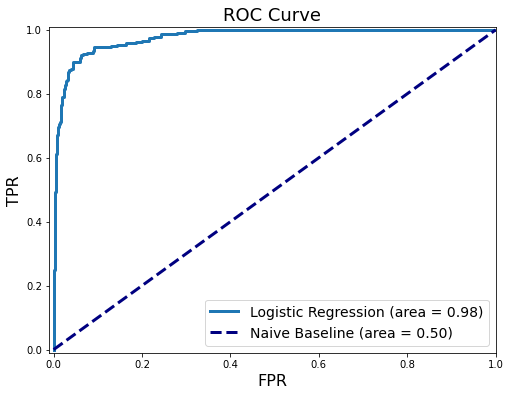

In [361]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# a iii
# AUC of Logistic Regression Model

y_prob = model.predict(test_isB)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print('Accuracy is: %.4f' %roc_auc)

plt.figure(figsize=(8, 6))
plt.title('ROC Curve', fontsize=18)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='Logistic Regression (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--', label='Naive Baseline (area = 0.50)')
plt.legend(loc='lower right', fontsize=14)
plt.show()

In [362]:
train_isB_enc = train_isB.drop(columns = ['letter'])
X_train_isB = train_isB_enc.drop(columns = ['isB'])
y_train_isB = train_isB_enc['isB']
test_isB_enc = test_isB.drop(columns = ['letter'])
X_test_isB = test_isB_enc.drop(columns = ['isB'])
y_test_isB = test_isB_enc['isB']

In [363]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# a iv
# set param_grid to be a linspace of ccp_alpha values instead of a specific value of ccp_alpha 
# and initialize DecisionTreeClassifier. 
# Then, I used gridSearchCv with model and grid-values from ccp_alpha. 
# And used scoring for ccp_alpha with  ‘accuracy’ on this model. Also did K-fold Cross validation with k = 5.
# I do cross-validation then, using accuracy as the performance metric. To set the cp parameter, 
# I tried different values of Cp between 0 and 0.10, and use 5-fold cross-validation. 
# And picking the one that maximized actually the largest value of CP that achieves the maximum accuracy,
grid_values = {'ccp_alpha': np.linspace(0, 0.10, 201)}
cv = KFold(n_splits=5,random_state=1,shuffle=True) 
dtc = DecisionTreeClassifier()
dtc_cv = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=cv, verbose=0) # default scoring metric to optimize is accuracy, used as default if none given.
dtc_cv.fit(X_train_isB, y_train_isB)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017...
       0.072 , 0.0725, 0.073 , 0.0735, 0.074 , 0.0745, 0.075 , 0.0755,
       0.076 , 0.0765, 0.077 , 0.0775, 0.078 , 0.0785, 0.079 , 0.0795,
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ])},
             scor

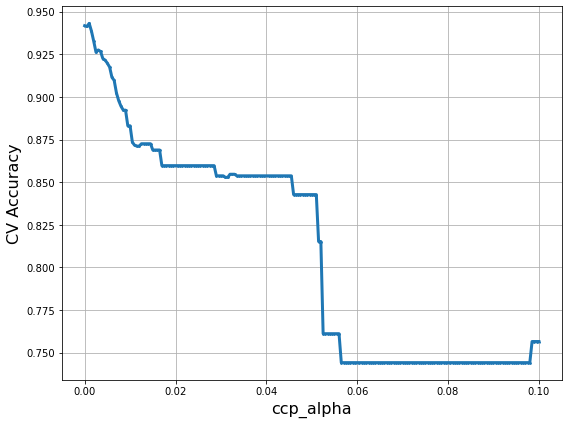

Best ccp_alpha {'ccp_alpha': 0.001}


In [364]:
# Define the best ccp_alpha

ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [365]:
# find the best ccp_alpha using best_params_[‘ccp_alpah’]

print('Grid best parameter ccp_alpha (max. accuracy): ', dtc_cv.best_params_['ccp_alpha'])
print('Grid best score (accuracy): ', dtc_cv.best_score_)

Grid best parameter ccp_alpha (max. accuracy):  0.001
Grid best score (accuracy):  0.9431434089811684


In [366]:
# performance metrics adn compute accuracy, TPR ,and FPR for classification tree model

y_pred = dtc_cv.predict(X_test_isB)
cm = confusion_matrix(y_test_isB, y_pred)
print ("Confusion Matrix : \n", cm)
acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)

Confusion Matrix : 
 [[667  31]
 [ 30 207]]
Accuracy is: 0.9348
TPR is: 0.8734
FPR is: 0.0444


In [367]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# a v
# Below is the code for building a Random Forest Regressor
rf = RandomForestClassifier()
rf.fit(X_train_isB, y_train_isB)

RandomForestClassifier()

In [368]:
rf.verbose = False

print('OSR2:', round(OSR2(rf, X_test_isB, y_test_isB, y_train_isB), 5))

OSR2: 0.91527


In [369]:
pd.DataFrame({'Feature' : X_train_isB.columns, 
              'Importance score': 100*rf.feature_importances_}).round(1)

,Feature,Importance score
0,xbox,1.8
1,ybox,2.2
2,width,2.2
3,height,2.1
4,onpix,2.2
5,xbar,2.9
6,ybar,7.8
7,x2bar,4.2
8,y2bar,15.4
9,xybar,5.8


In [370]:
# performance metrics adn compute accuracy, TPR ,and FPR for Random Forest Regressor

y_pred = rf.predict(X_test_isB)
y_pred_thredhold = [1 if i >= 0.5 else 0 for i in y_pred]
cm = confusion_matrix(y_test_isB, y_pred_thredhold)
print ("Confusion Matrix : \n", cm)
acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
print('Accuracy is: %.4f' %acc)
print('TPR is: %.4f' % TPR)
print('FPR is: %.4f' % FPR)

Confusion Matrix : 
 [[689   9]
 [  6 231]]
Accuracy is: 0.9840
TPR is: 0.9747
FPR is: 0.0129


In [371]:
# a vi
# Accuracy of each models
table = {'Linear Regression Threshold': 0.9412, 'CART': 0.9348, 'Random Forest Regressor': 0.9840}
table

{'Linear Regression Threshold': 0.9412,
 'CART': 0.9348,
 'Random Forest Regressor': 0.984}

In [372]:
# Random Forest Regressor has best performs on the test set 
# Accuracy is more important in this application since there are some feature such as y2bar, yedge that effect to result more
# on importance score. you can look at feature importance numbers for random forests to get some sense of the interpretability 

In [373]:
# b i 
# Figure it out most frequency letter class in training set
itsA = np.sum(train['letter'] == 'A')
itsB = np.sum(train['letter'] == 'B')
itsP = np.sum(train['letter'] == 'P')
itsR = np.sum(train['letter'] == 'R')

itsA, itsB, itsP, itsR

(562, 529, 578, 512)

In [374]:
#Baseline method on test set
itsP = np.sum(test['letter'] == 'P')
notP = len(test) - itsP
print(pd.Series({'0': notP, '1': itsP}))
acc = itsP / (notP + itsP)
print('Accuracy is: %.4f' % acc)

0    710
1    225
dtype: int64
Accuracy is: 0.2406


In [375]:
X_train = train.drop(columns = ['letter'])
y_train = train['letter']
X_test = test.drop(columns = ['letter'])
y_test = test['letter']

In [376]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#b ii
# Below is the code for building a LDA Model

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [377]:
# Accuracy for LDA Model
y_pred = lda.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[211   2   4  10]
 [  0 211   0  26]
 [  0  12 211   2]
 [  0  36   1 209]]

Accuracy: 0.9005347593582887


In [378]:
# b iii
# Below is the code for building a CART Model

# set param_grid to be a linspace of ccp_alpha values instead of a specific value of ccp_alpha 
# and initialize DecisionTreeClassifier. 
# Then, I used gridSearchCv with model and grid-values from ccp_alpha. 
# And used scoring for ccp_alpha with  ‘accuracy’ on this model. Also did K-fold Cross validation with k = 10.
# I do cross-validation then, using accuracy as the performance metric. To set the cp parameter, 
# I tried different values of Cp between 0 and 0.10, and use 10-fold cross-validation. 
# And picking the one that maximized actually the largest value of CP that achieves the maximum accuracy,

grid_values = {'ccp_alpha': np.linspace(0, 0.1, 101)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10).fit(X_train, y_train)

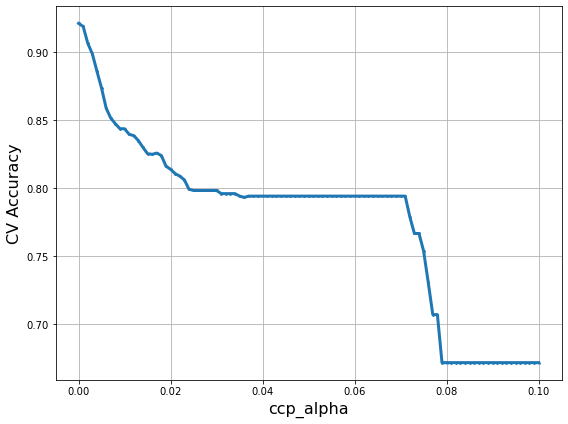

Best ccp_alpha {'ccp_alpha': 0.0}


In [379]:
# Define the best ccp_alpha

ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

In [380]:
# Accuracy for CART Model
y_pred = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[218   5   1   3]
 [  2 201   6  28]
 [  0   8 216   1]
 [  5  27   3 211]]

Accuracy: 0.9048128342245989


In [381]:
# b iv
# Below is the code for building a bagging of CART Model
print(len(X_train.columns))
rf = RandomForestClassifier(max_features=16, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train, y_train)

16


RandomForestClassifier(max_features=16, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [382]:
# Accuracy for Bagging

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[220   2   1   4]
 [  1 224   4   8]
 [  0   4 221   0]
 [  2  20   1 223]]

Accuracy: 0.9497326203208556


In [383]:
import time

# b v
# Below is the code for building a Random Forest Model with CV
grid_values = {'max_features': np.linspace(1,120,120, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

tic = time.time()

rf_a = RandomForestClassifier() 
rf_cv = GridSearchCV(rf_a, param_grid=grid_values, cv=5)
rf_cv.fit(X_train, y_train)

toc = time.time()

print('time:', round(toc-tic, 2),'s')

/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
520 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
520 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 441, in fit
    trees = Parallel(
  File "/opt/anaconda3/envs/sklearn-env/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one

time: 193.8 s


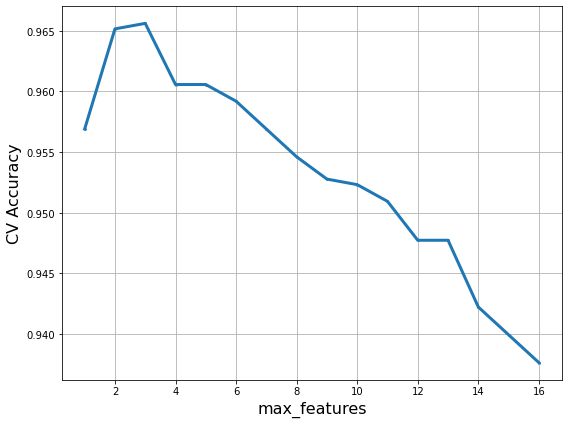

Best parameters {'max_features': 3, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}


In [384]:
# I set the max features parameters using cross-validation, trying different values between 
# 1, 120, and I ended up picking the smallest value of max features that maximizes the accuracy.
max_features = rf_cv.cv_results_['param_max_features'].data
ACC_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max_features', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(max_features, ACC_scores, s=3)
plt.plot(max_features, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best parameters', rf_cv.best_params_)

In [385]:
y_pred = rf_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[223   1   2   1]
 [  0 230   1   6]
 [  0   5 218   2]
 [  0  18   0 228]]

Accuracy: 0.9614973262032086


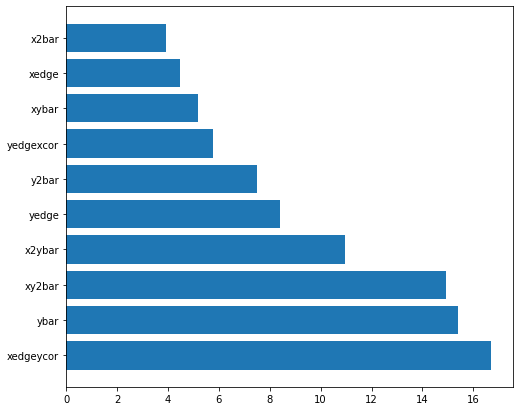

In [386]:
sorted_idx = rf_cv.best_estimator_.feature_importances_.argsort()

feature_importances = rf_cv.best_estimator_.feature_importances_[sorted_idx[::-1]]
feature_names = X_train.columns[sorted_idx[::-1]]

plt.figure(figsize=(8,7))
plt.barh(feature_names[:10], 100*feature_importances[:10])
plt.show()

In [387]:
from sklearn.ensemble import GradientBoostingClassifier

# b vi
# Below is the code for building a boosting models
tic = time.time()
gbc = GradientBoostingClassifier(n_estimators=3300, max_leaf_nodes=10)
gbc.fit(X_train, y_train)
toc = time.time()
print('time:', round(toc-tic, 2),'s')

time: 23.83 s


In [388]:
y_pred = gbc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[225   1   0   1]
 [  0 233   0   4]
 [  0   4 220   1]
 [  0  12   0 234]]

Accuracy: 0.9754010695187165


In [389]:
# c
# Metrics functions
def accuracy_fucntion(y_pred, y_test):
    cm = confusion_matrix(y_test, y_pred)
    return accuracy_score(y_test, y_pred)

In [391]:
import time

def bootstrap_validation(test_data, test_label, train_label, model, metrics_list, sample=500, random_state=66):
    tic = time.time()
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array=np.zeros([n_sample, n_metrics])
    output_array[:]=np.nan
    print(output_array.shape)
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        bs_data = test_data.loc[bs_index]
        bs_label = test_label.loc[bs_index]
        bs_predicted = model.predict(bs_data)
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            output_array[bs_iter, metrics_iter]=metrics(bs_predicted,bs_label)
#         if bs_iter % 100 == 0:
#             print(bs_iter, time.time()-tic)
    output_df = pd.DataFrame(output_array)
    return output_df

In [392]:
bs_output_randomf = bootstrap_validation(X_test,y_test,y_train,rf_cv, metrics_list=[accuracy_fucntion], sample = 5000)

(5000, 1)


In [399]:
bs_output_randomf

,0
0,0.964706
1,0.965775
2,0.958289
3,0.966845
4,0.962567
...,...
4995,0.958289
4996,0.962567
4997,0.968984
4998,0.962567


In [394]:
bs_output_LDA = bootstrap_validation(X_test,y_test,y_train,lda, metrics_list=[accuracy_fucntion], sample = 5000)

(5000, 1)


In [395]:
bs_output_CART = bootstrap_validation(X_test,y_test,y_train,dtc_cv, metrics_list=[accuracy_fucntion], sample = 5000)

(5000, 1)


In [396]:
bs_output_bagging = bootstrap_validation(X_test,y_test,y_train,rf, metrics_list=[accuracy_fucntion], sample = 5000)

(5000, 1)


In [397]:
bs_output_boosting = bootstrap_validation(X_test,y_test,y_train,gbc, metrics_list=[accuracy_fucntion], sample = 5000)

(5000, 1)


(-0.04, 0.13)

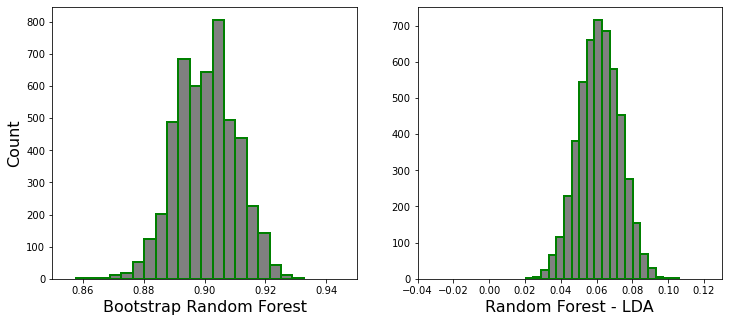

In [414]:
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap Random Forest', fontsize=16)
axs[1].set_xlabel('Random Forest - LDA', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output_LDA.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.85, 0.95])
axs[1].hist(bs_output_randomf.iloc[:,0]-bs_output_LDA.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.04,0.13])

(-0.04, 0.13)

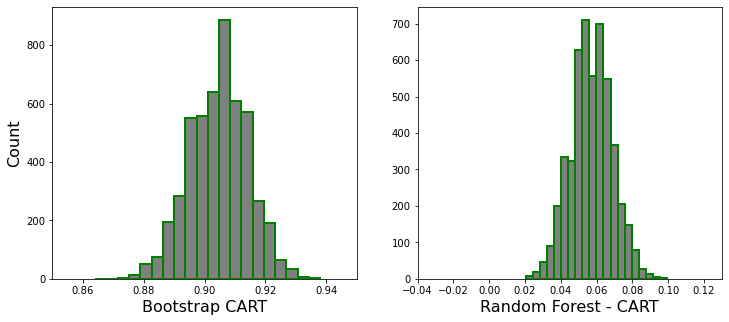

In [416]:
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap CART', fontsize=16)
axs[1].set_xlabel('Random Forest - CART', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output_CART.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.85,0.95])
axs[1].hist(bs_output_randomf.iloc[:,0]-bs_output_CART.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.04,0.13])

(-0.04, 0.06)

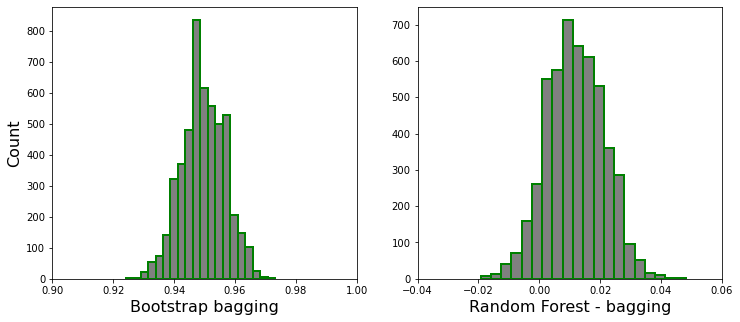

In [420]:
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap bagging', fontsize=16)
axs[1].set_xlabel('Random Forest - bagging', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output_bagging.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.9,1])
axs[1].hist(bs_output_randomf.iloc[:,0]-bs_output_bagging.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.04,0.06])

(-0.07, 0.04)

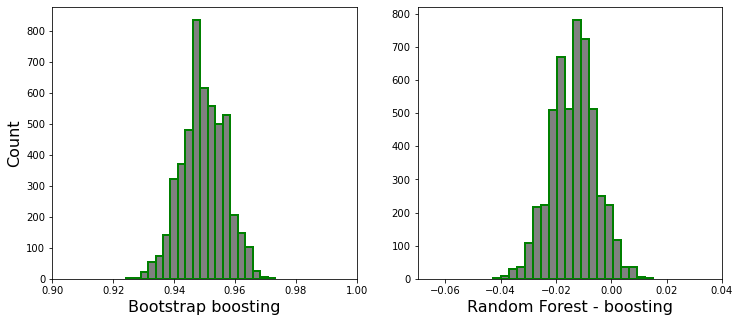

In [422]:
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap boosting', fontsize=16)
axs[1].set_xlabel('Random Forest - boosting', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output_bagging.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.9,1])
axs[1].hist(bs_output_randomf.iloc[:,0]-bs_output_boosting.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.07,0.04])

(-0.07, 0.04)

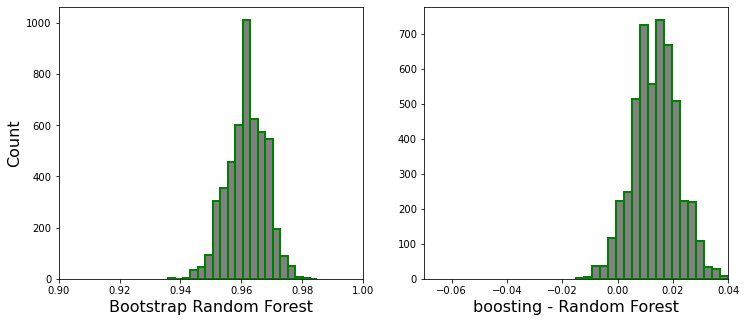

In [424]:
fig, axs = plt.subplots(ncols=2, figsize=(12,5))
axs[0].set_xlabel('Bootstrap Random Forest', fontsize=16)
axs[1].set_xlabel('boosting - Random Forest', fontsize=16)
axs[0].set_ylabel('Count', fontsize=16)
axs[0].hist(bs_output_randomf.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[0].set_xlim([0.9,1])
axs[1].hist(bs_output_boosting.iloc[:,0]-bs_output_randomf.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs[1].set_xlim([-0.07,0.04])

In [426]:
np.mean(bs_output_randomf)

0    0.961654
dtype: float64

In [427]:
np.mean(bs_output_boosting)

0    0.975412
dtype: float64

In [448]:
CI_0 = np.quantile(bs_output_boosting.iloc[:,0]-bs_output_randomf.iloc[:,0],np.array([0.025,0.975]))
lower = np.quantile(bs_output_boosting.iloc[:,0]-bs_output_randomf.iloc[:,0],0.025)
upper = np.quantile(bs_output_boosting.iloc[:,0],0.975)
CI = []
CI.append(lower)
CI.append(upper)
print("The 95-percent confidence interval of Boosting is %s" % CI) 

The 95-percent confidence interval of Boosting is [-0.002139037433155022, 0.9850267379679144]


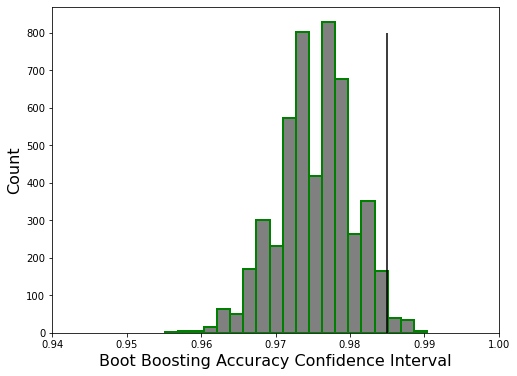

In [451]:
fig, axs = plt.subplots(ncols=1, figsize=(8,6))
axs.set_xlabel('Boot Boosting Accuracy Confidence Interval', fontsize=16)
axs.set_ylabel('Count', fontsize=16)
axs.hist(bs_output_boosting.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color = "grey")
axs.set_xlim([0.94,1.0])
axs.vlines(x=CI[0], ymin = 0, ymax =800, color = "black")
axs.vlines(x=CI[1], ymin = 0, ymax =800, color = "black")